<a href="https://colab.research.google.com/github/perellama/Algoritmos-de-optimizaci-n/blob/main/Mikel_Pereda_Trabajo_Pr%C3%A1ctico_Algoritmos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Algoritmos de optimización - Trabajo Práctico<br>
Nombre y Apellidos: Mikel Pereda Perea  <br>
Url: <br>
Google Colab: https://colab.research.google.com/drive/1XyDY1sDJO0CrizylYSO4_ByuRmY7Qf0W#scrollTo=HZz52wOppp-U <br>
Problema:
>1. Sesiones de doblaje <br>
>2. Organizar los horarios de partidos de La Liga<br>
>3. Configuración de Tribunales

Descripción del problema:(copiar enunciado)
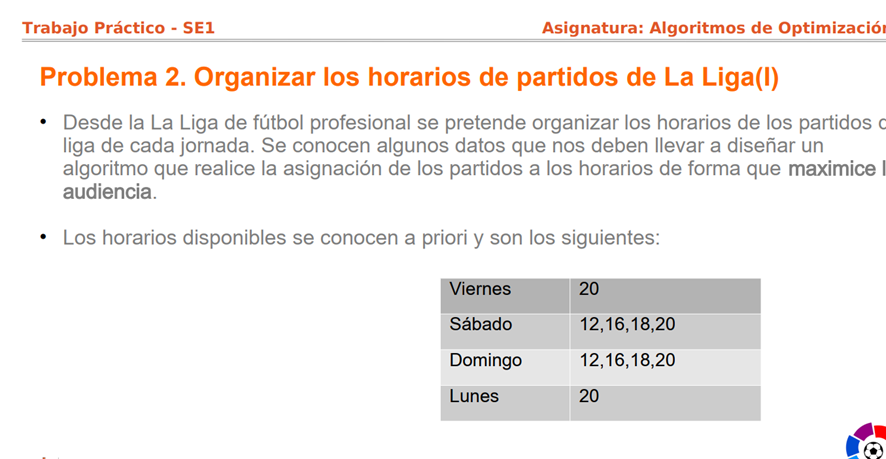

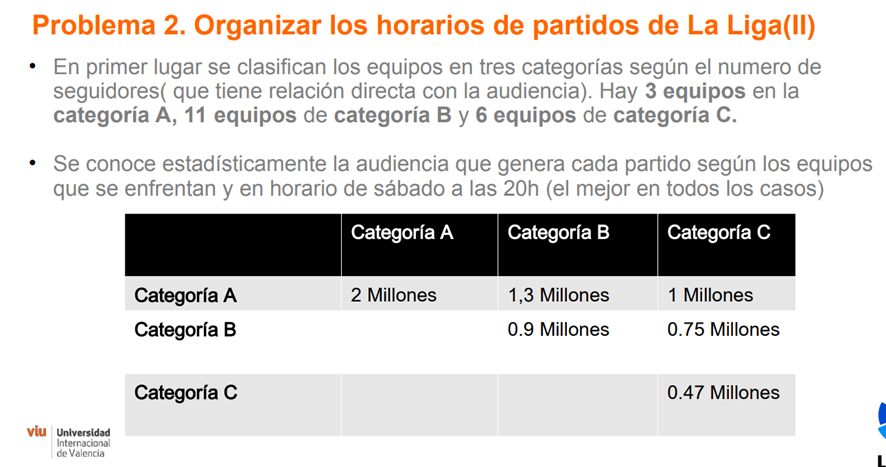

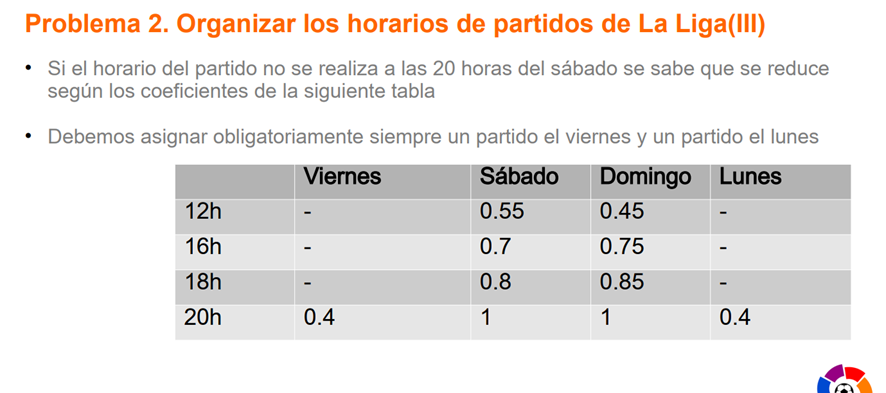

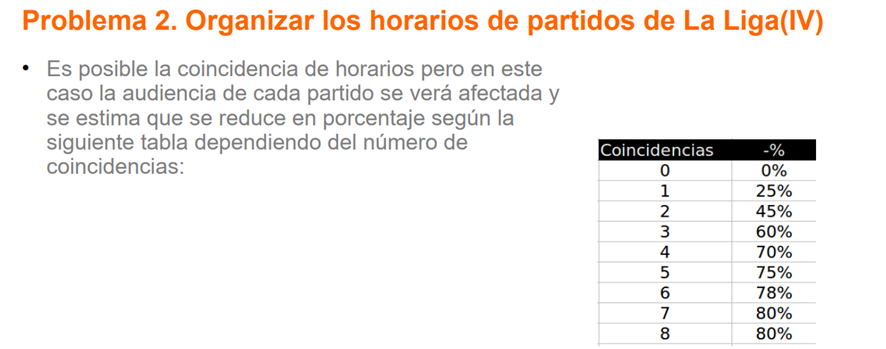

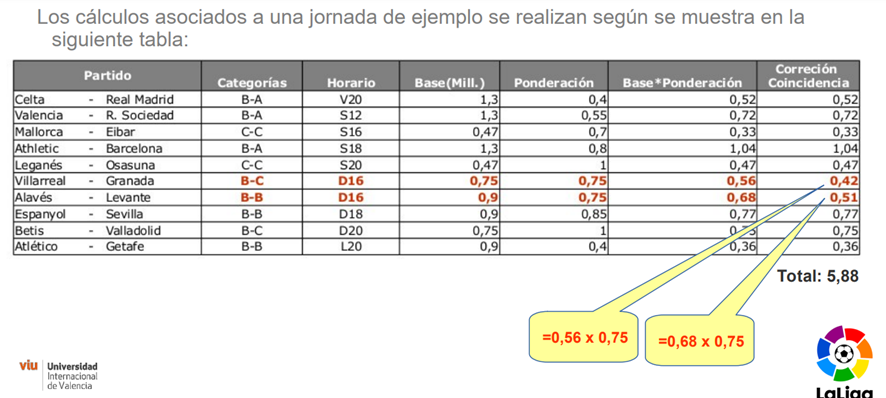

....







                                        

#Modelo
- ¿Como represento el espacio de soluciones?
- ¿Cual es la función objetivo?
- ¿Como implemento las restricciones?

#Representación espacio de soluciones

El espacio de soluciones se presenta mediante un array de 10 posiciones. Cada posición del array es cada partido, expresando el horario que se le asocia.

A continuación se muestra la función para generar una solución aleatoriamente.

In [2]:
import random

def crear_solucion():

  Horarios_pos=[0,1,2,3,4,5,6,7,8,9]
  Horarios_VL=[0,9]
  zero=0
  nueve=0
  solucion = []

  for n in range(10):
    if n>=8:
      if zero==0 and nueve==0:
        x=random.choice(Horarios_VL)
        Horarios_VL.remove(x)
        Horarios_pos.remove(x)
      elif n>=9 and zero==0:
        x=0
        zero=1
        Horarios_pos.remove(x)
      elif n>=9 and nueve==0:
        x=9
        nueve=1
        Horarios_pos.remove(x)
      else:
        x=random.choice(Horarios_pos)
        if x==0:
          zero=1
          Horarios_pos.remove(x)
        elif x==9:
          nueve=1
          Horarios_pos.remove(x)

    else:
      x=random.choice(Horarios_pos)
      if x==0:
        zero=1
        Horarios_pos.remove(x)
      elif x==9:
        nueve=1
        Horarios_pos.remove(x)

    solucion.append(x)

  return solucion

x=crear_solucion()
x

[4, 1, 2, 7, 4, 7, 7, 3, 9, 0]

De la solución creada aleatoriamente [5,0,7,6,7,1,5,5,2,9], significaría que el Celta-Real Madrid se jugaría el Domingo a las 16h.

La función esta creada para que genere resultadon donde el Viernes a las 20h y el Lunes a las 20h sean parte de la solución y solo aparezcan una vez. El resto de horarios se pueden repetir o no seleccionar. Es decir, las restricciones están implementadas a la hora de generar una solución.


#Función objetivo

La función objetivo se extrae mediante la siguiente función.


In [3]:
import numpy as np

def extraer_resultado(sol):

  Partidos_={'Celta-Real Madrid':1.3,'Valencia-Real Sociedad':1.3, 'Mallorca-Eibar':0.47,'Athletic-Barcelona':1.3, 'Leganes-Osasuna':0.47,'Villareal-Granada':0.75,'Alaves-Levante':0.9,'Espanyol-Sevilla':0.9,'Betis-Valladolid':0.75, 'Atletico-Getafe':0.9}
  Partidos=['Celta-Real Madrid','Valencia-Real Sociedad','Mallorca-Eibar','Athletic-Barcelona','Leganes-Osasuna','Villareal-Granada','Alaves-Levante','Espanyol-Sevilla','Betis-Valladolid','Atletico-Getafe']
  Horarios_={'V20':0.4,'S12':0.55,'S16':0.7,'S18':0.8,'S20':1,'D12':0.45,'D16':0.75,'D18':0.85,'D20':1,'L20':0.4}
  Horarios=['V20','S12','S16','S18','S20','D12','D16','D18','D20','L20']
  Coincidencias=[1,0.75,0.55,0.40,0.30,0.25,0.22,0.20,0.20]
  repes=[0,0,0,0,0,0,0,0,0,0]
  ponderaciones=[]
  for i in range(len(sol)):
    x=sol[i]
    partido=Partidos[i]
    horario=Horarios[x]
    repes[x]+=1
    ponderaciones.append((Horarios_[horario])*(Partidos_[partido]))

  for k in range(len(sol)):
    horario_=sol[k]
    coincid=repes[horario_]
    pond=Coincidencias[coincid-1]
    ponderaciones[k]*=pond


  resultado=0

  for j in ponderaciones:
    resultado+=j

  return resultado

extraer_resultado(x)

5.130625

En este caso, la audencia del resultado extraido anteriormente seria de 3,563175 Millones. Se realiza mediante los datos de partida conocidos.

#Análisis
- ¿Que complejidad tiene el problema?. Orden de complejidad y Contabilizar el espacio de soluciones

El algoritmo de busqueda aleatoria dispone de una complejidad computacional de n*m. Donde n es el numero de iteraciones de busqueda aleatoria y m=10 el tamaño del array del espacio de soluciones, el tamaño del espacio de soluciones.

En cambio, el algoritmo de busqueda local tiene un coste computacional de n*m^2 donde n es el numero de iteraciones del bucle while, y m=10, utilizado para extraer_resultado y generar_vecino.




#Diseño
- ¿Que técnica utilizo? ¿Por qué?

#Busqueda aleatoria

Inicialmente he realizado una busqueda aleatoria de de n=50.000. De tal manera busco una buena solución de inicio. Contemple la opción de realizar una busqueda local desde el inicio, pero se quedaba en máximos locales.

In [4]:
def busqueda_aleatoria(n):
  mejor_res=0
  for i in range(n):
    solucion=crear_solucion()
    result=extraer_resultado(solucion)
    if result>mejor_res:
      mejor_sol=solucion
      mejor_res=result

  return mejor_sol,mejor_res



mejor_sol,mejor_res=busqueda_aleatoria(50000)
print(mejor_sol,mejor_res)

[4, 6, 0, 8, 5, 7, 3, 9, 2, 1] 6.712000000000001


Mediante el algoritmo de busqueda aleatoria, encontramos una solución que genera una audiencia de 6,712 Millones.



#Busqueda local

Ahora se quiere buscar una solución mejor desde la solución ya obtenida. Para ello, se crea la función de vecindad para crear otras psoibles soluciones parecidas a la obtenida tratando de mejorarla.

In [5]:
def genera_vecina(solucion,mejor_res):
  mejor_solucion = solucion
  mejor_distancia = mejor_res
  for i in range(1,len(solucion)-1):
    for j in range(i+1, len(solucion)):

      vecina = solucion[:i] + [solucion[j]] + solucion[i+1:j] + [solucion[i]] + solucion[j+1:]

      distancia_vecina = extraer_resultado(vecina)

      if distancia_vecina >= mejor_distancia:
        mejor_distancia = distancia_vecina
        mejor_solucion = vecina
  return mejor_solucion


Con la busqueda local se pretende buscar una solución mejor a la encontrada con busqueda aleatoria, partiendo de ella. Para ello, se generan vecindades y se va mejorando la solución hasta no obtener una mejor.

In [8]:
def busqueda_local(solucion_referencia):
  mejor_solucion = []

  mejor_audiencia = extraer_resultado(solucion_referencia)

  iteracion=0
  while(1):
    iteracion +=1

    vecina = genera_vecina(solucion_referencia,mejor_audiencia)

    distancia_vecina = extraer_resultado(vecina)

    if distancia_vecina > mejor_audiencia:
      mejor_solucion = vecina
      mejor_audiencia = distancia_vecina

    else:
      print("En la iteracion ", iteracion, ", la mejor solución encontrada es:" , mejor_solucion)
      print("Audiencia:" , mejor_audiencia)
      return mejor_solucion

    solucion_referencia = vecina


sol = busqueda_local(mejor_sol)
res_=extraer_resultado(sol)

En la iteracion  5 , la mejor solución encontrada es: [4, 7, 0, 8, 9, 5, 3, 6, 1, 2]
Audiencia: 6.856


In [22]:
def printear_resultado(sol):

  Partidos_={'Celta-Real Madrid':1.3,'Valencia-Real Sociedad':1.3, 'Mallorca-Eibar':0.47,'Athletic-Barcelona':1.3, 'Leganes-Osasuna':0.47,'Villareal-Granada':0.75,'Alaves-Levante':0.9,'Espanyol-Sevilla':0.9,'Betis-Valladolid':0.75, 'Atletico-Getafe':0.9}
  Partidos=['Celta-Real Madrid','Valencia-Real Sociedad','Mallorca-Eibar','Athletic-Barcelona','Leganes-Osasuna','Villareal-Granada','Alaves-Levante','Espanyol-Sevilla','Betis-Valladolid','Atletico-Getafe']
  Horarios_={'V20':0.4,'S12':0.55,'S16':0.7,'S18':0.8,'S20':1,'D12':0.45,'D16':0.75,'D18':0.85,'D20':1,'L20':0.4}
  Horarios=['V20','S12','S16','S18','S20','D12','D16','D18','D20','L20']
  Coincidencias=[1,0.75,0.55,0.40,0.30,0.25,0.22,0.20,0.20]
  repes=[0,0,0,0,0,0,0,0,0,0]

  ponderaciones=[]

  for i in range(len(sol)):
    x=sol[i]
    partido=Partidos[i]
    horario=Horarios[x]
    repes[x]+=1
    ponderaciones.append((Horarios_[horario])*(Partidos_[partido]))

  for k in range(len(sol)):
    horario_=sol[k]
    coincid=repes[horario_]
    pond=Coincidencias[coincid-1]
    ponderaciones[k]*=pond


  resultado=0

  for j in ponderaciones:
    resultado+=j

  import pandas as pd

  Hor=[]

  for i in sol:
    Hor.append(Horarios[i])
  Resultado = pd.DataFrame(Partidos, columns=['Partidos'],index=None)
  Resultado['Horarios']=Hor
  Resultado['Audiencias']=ponderaciones
  print(Resultado)

  print("                                       ",resultado)

printear_resultado(sol)


                 Partidos Horarios  Audiencias
0       Celta-Real Madrid      S20      1.3000
1  Valencia-Real Sociedad      D18      1.1050
2          Mallorca-Eibar      V20      0.1880
3      Athletic-Barcelona      D20      1.3000
4         Leganes-Osasuna      L20      0.1880
5       Villareal-Granada      D12      0.3375
6          Alaves-Levante      S18      0.7200
7        Espanyol-Sevilla      D16      0.6750
8        Betis-Valladolid      S12      0.4125
9         Atletico-Getafe      S16      0.6300
                                        6.856
